In [1]:
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# OCO2 - Analyze the CO² plume of Laiwu city

Project for **Data For Good**, season 7. 

*By Quentin Kamenda, Benoît Courty*


---

## Introduction

Using Data from [OCO-2 Satellite](en.wikipedia.org/wiki/Orbiting_Carbon_Observatory_2), issued by the NASA.

`//TODO: Explanation`

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#from mpl_toolkits.basemap import Basemap  #Imported directly from the github repository

---

## Retieve Data

Sample data can be accessed freely on the NASA Database, among other open data from several NASA sattelites.

We will be using CSV aggregated by *Benoit Courty* [here](https://courty.fr/OCO2/).

In [4]:
#data_1610 = pd.read_csv("http://courty.fr/OCO2/oco2_1610.csv", sep=";")
#data_1705 = pd.read_csv("http://courty.fr/OCO2/oco2_1705.csv", sep=";")
#data_1803 = pd.read_csv("http://courty.fr/OCO2/oco2_1803.csv", sep=";")
#data_1805 = pd.read_csv("http://courty.fr/OCO2/oco2_1805.csv", sep=";")
#data_1808 = pd.read_csv("http://courty.fr/OCO2/oco2_1808.csv", sep=";")
data_1808 = pd.read_csv("../../../datasets/OCO2/csv/oco2_1808.csv", sep=";")
#data_1809 = pd.read_csv("http://courty.fr/OCO2/oco2_1809.csv", sep=";")

data_1808.head()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v
0,2018080100462105,-33.015541,-164.508881,405.143188,0.491368,21709,3.749916,9.128431
1,2018080100462137,-32.988529,-164.553787,404.893677,0.497189,21709,3.720200,9.087859
2,2018080100462171,-32.996235,-164.435699,404.729431,0.537358,21709,3.815527,9.151507
3,2018080100462172,-32.992409,-164.455872,404.819550,0.498803,21709,3.799832,9.138914
4,2018080100462173,-32.988403,-164.476196,404.706451,0.496855,21709,3.783962,9.126184


In [5]:
data_1808.describe()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v
count,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06,2.709745e+06
mean,2.018082e+15,9.176796e+00,-3.778302e+00,4.047848e+02,5.104777e-01,2.194239e+04,-1.533030e+00,2.852832e-01
std,9.141199e+08,2.900338e+01,1.112529e+02,1.868212e+00,1.293196e-01,1.332497e+02,4.292128e+00,3.490388e+00
min,2.018080e+15,-5.199191e+01,-1.799998e+02,3.895988e+02,2.017396e-03,2.170900e+04,-1.231609e+01,-1.428720e+01
25%,2.018081e+15,-1.714714e+01,-1.143912e+02,4.038899e+02,4.171058e-01,2.181300e+04,-4.930158e+00,-2.060896e+00
50%,2.018082e+15,4.388992e+00,4.388185e-01,4.052918e+02,4.851733e-01,2.195700e+04,-2.304201e+00,3.646293e-01
75%,2.018082e+15,3.448813e+01,1.007937e+02,4.060902e+02,5.803099e-01,2.205600e+04,1.599859e+00,2.797290e+00
max,2.018083e+15,8.186122e+01,1.799996e+02,4.169399e+02,1.983425e+00,2.216000e+04,1.637950e+01,1.493328e+01


To convert the  ``` sounding_id ``` into a datetime variable ```data```:



In [6]:
from datetime import datetime
def to_date(a):
    return datetime.strptime(str(a), '%Y%m%d%H%M%S%f')

# data_1610['date'] = data_1610['sounding_id'].apply(to_date)
# data_1705['date'] = data_1705['sounding_id'].apply(to_date)
# data_1803['date'] = data_1803['sounding_id'].apply(to_date)
# data_1805['date'] = data_1805['sounding_id'].apply(to_date)
data_1808['date'] = data_1808['sounding_id'].apply(to_date)
# data_1809['date'] = data_1809['sounding_id'].apply(to_date)

In [7]:
data_1808.head()

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v,date
0,2018080100462105,-33.015541,-164.508881,405.143188,0.491368,21709,3.749916,9.128431,2018-08-01 00:46:21.050
1,2018080100462137,-32.988529,-164.553787,404.893677,0.497189,21709,3.720200,9.087859,2018-08-01 00:46:21.370
2,2018080100462171,-32.996235,-164.435699,404.729431,0.537358,21709,3.815527,9.151507,2018-08-01 00:46:21.710
3,2018080100462172,-32.992409,-164.455872,404.819550,0.498803,21709,3.799832,9.138914,2018-08-01 00:46:21.720
4,2018080100462173,-32.988403,-164.476196,404.706451,0.496855,21709,3.783962,9.126184,2018-08-01 00:46:21.730


We are seaking the emission peaks taken as an example in the annexes of F. Chevallier's article **Observing carbon dioxide emissions over China's cities with the Orbiting Carbon Observatory-2**:



*   Over Anshan, the 17th October 2016 
*   Over Baotou, the 17th May 2018
*   Over Dezhou, the 24th September 2018
*   Over Laiwu, the 25th August 2018
*   Over Nanjing, the 9th March 2018
*   Over Tangshan, the 18th May 2017



---

### Laiwu, 25th August 2018

In [8]:
# We consider the August 2018 datset at the right day
data_1808_25 = data_1808[data_1808['date'] < "2018-08-26"]
data_1808_25 = data_1808_25[data_1808_25['date'] > "2018-08-25"]

#draw_map(data_1808_25)

In [9]:
# We consider the orgit going over East China
#data_laiwu = data_1808_25[data_1808_25['longitude'] > 110]
#data_laiwu = data_laiwu[data_laiwu['longitude'] < 125]
data_laiwu = data_1808_25[data_1808_25['orbit'] == 22061]
data_laiwu.head(3)

,sounding_id,latitude,longitude,xco2,xco2_uncert,orbit,windspeed_u,windspeed_v,date
2061319,2018082504501738,-43.749119,135.989822,403.642273,0.572042,22061,11.114212,-4.509858,2018-08-25 04:50:17.380
2061320,2018082504501777,-43.735889,136.010880,404.398529,0.466245,22061,11.103701,-4.486870,2018-08-25 04:50:17.770
2061321,2018082504501778,-43.731358,135.985352,404.115814,0.528921,22061,11.101484,-4.501010,2018-08-25 04:50:17.780


### Keep only the city zone

In [10]:
data_laiwu=data_laiwu.query('longitude>116.5 and longitude<118.2 and latitude>35.4 and latitude<37.1')

### Plot the OCO2 sensor data

/media/data-nvme/dev/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/media/data-nvme/dev/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/media/data-nvme/dev/anaconda3/lib/python3.7/site-packages/pandas/plotting/_tools.py:308: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/media/data-nvme/dev/anaconda3/lib/python3.

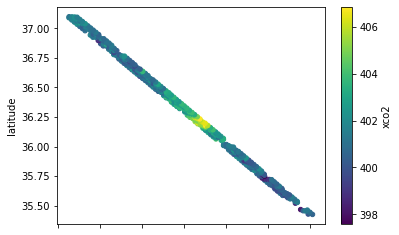

In [11]:
data_laiwu.plot.scatter(x='longitude', y='latitude', c='xco2', colormap='viridis')

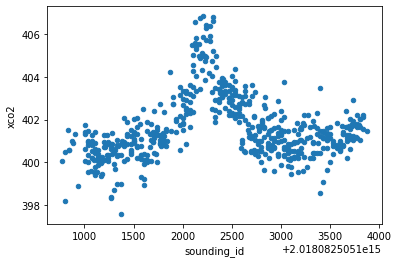

In [12]:
data_laiwu.plot.scatter(x='sounding_id', y='xco2')

### Compute distance from latitude, longitude (haversine)

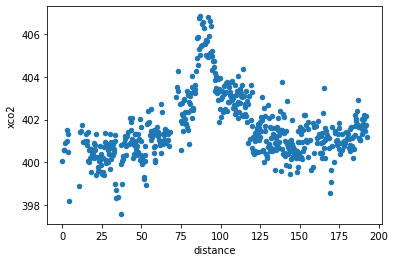

In [13]:
import math
#TODO: Change the formula to compute the distance from the trace origin
latitude_origin = data_laiwu.iloc[0]['latitude']
longitude_origin = data_laiwu.iloc[0]['longitude']
data_laiwu['distance'] = 6367 * 2 * np.arcsin(np.sqrt(np.sin((np.radians(data_laiwu['latitude'])
    - math.radians(latitude_origin))/2)**2 + math.cos(math.radians(latitude_origin))
    * np.cos(np.radians(data_laiwu['latitude'])) * np.sin((np.radians(data_laiwu['longitude'])
    - math.radians(longitude_origin))/2)**2))
data_laiwu.plot.scatter(x='distance', y='xco2')

# Gaussian fit

## scipy curve_fit

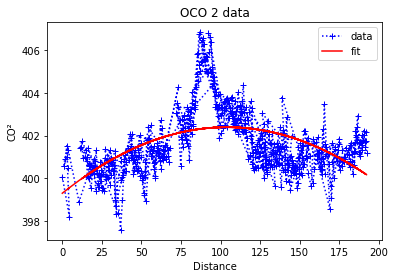

In [14]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np

x = data_laiwu['distance']
y = data_laiwu['xco2']

# weighted arithmetic mean (corrected - check the section below)
mean = sum(x * y) / sum(y)
sigma = np.sqrt(sum(y * (x - mean)**2) / sum(y))

def Gauss(x, a, x0, sigma):
    return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

popt,pcov = curve_fit(Gauss, x, y, p0=[max(y), mean, sigma])

plt.plot(x, y, 'b+:', label='data')
plt.plot(x, Gauss(x, *popt), 'r-', label='fit')
plt.legend()
plt.title('OCO 2 data')
plt.xlabel('Distance')
plt.ylabel('CO²')
plt.show()

## sklearn GaussianProcessRegressor

In [15]:
# Author: Vincent Dubourg <vincent.dubourg@gmail.com>
#         Jake Vanderplas <vanderplas@astro.washington.edu>
#         Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>s
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.random.seed(1)


# def f(x):
#     """The function to predict."""
#     return x * np.sin(x)

# # now the noisy case
# X = np.linspace(0.1, 9.9, 20)
# X = np.atleast_2d(X).T

# # Observations and noise
# y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
# noise = np.random.normal(0, dy)
# y += noise

# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)
#x.to_array
X = np.array(x).reshape(-1, 1)
X.shape
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(X, return_std=True)

# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
#plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()


NameError: name 'kernel' is not defined

## GPflow

In [ ]:
!pip install GPflow

In [ ]:
# https://blog.dominodatalab.com/fitting-gaussian-process-models-python/

import GPflow

k = GPflow.kernels.Matern32(1, variance=1, lengthscales=1.2)
m = GPflow.gpr.GPR(X, Y, kern=k)
m.likelihood.variance = 0.01
m.optimize()


In [ ]:
!pip install lmfit

## LMfit GaussianModel
https://lmfit.github.io/lmfit-py/model.html#lmfit.model.Model.fit

In [ ]:
import numpy as np
from lmfit import Model
from lmfit.models import GaussianModel, ConstantModel
import matplotlib.pyplot as plt

xval = np.array(x)
yval = np.array(y)
#err = np.array(e)

peak = GaussianModel()
offset = ConstantModel()
model = peak + offset

pars = offset.make_params(c=np.median(y))
pars += peak.guess(yval, x=xval, amplitude=-0.5)

result = model.fit(yval, pars, x=xval) # , weights=1/err
print(result.fit_report())

plt.plot(xval, yval, 'ro', ms=6)
plt.plot(xval, result.best_fit, 'b--')





In [ ]:
import numpy as np
from lmfit import Model
from lmfit.models import GaussianModel, ConstantModel
import matplotlib.pyplot as plt

xval = np.array(data_laiwu['distance'])
yval = np.array(data_laiwu['xco2'])
err = np.array(data_laiwu['xco2_uncert'])

peak = GaussianModel()
offset = ConstantModel()
model = peak + offset

pars = offset.make_params(c=np.median(y))
pars += peak.guess(yval, x=xval, amplitude=-5)
print(pars)
result = model.fit(yval, pars, x=xval, weights=1/err)
print(result.fit_report())

plt.plot(xval, yval, 'ro', ms=6)
plt.plot(xval, result.best_fit, 'b--')

In [ ]:

# <examples/doc_model_gaussian.py>
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt

from lmfit import Model

x = data_laiwu['distance']
y = data_laiwu['xco2']

def gaussian(x, amp, cen, wid):
    """1-d gaussian: gaussian(x, amp, cen, wid)"""
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))

gmodel = Model(gaussian)
print('parameter names: {}'.format(gmodel.param_names))
print('independent variables: {}'.format(gmodel.independent_vars))
result = gmodel.fit(y, x=x, amp=500, cen=402, wid=1)

print(result.fit_report())

plt.plot(x, y, 'bo')
plt.plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.show()

In [ ]:
# We retrieve the Figure 2.A
draw_map(data_laiwu, lon_min=70, lon_max=140, lat_min=15, lat_max=55, frontier=True, size_point=5)

In [ ]:
# We represent the observation zoomed on Anshan
draw_map(data_laiwu, lon_min=116.5, lon_max=118.2, lat_min=35.4, lat_max=37.1, frontier=True, size_point=5)

# Switch to Cartopy

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np

# import cartopy.crs as ccrs
# import cartopy.feature as cfeature


# def sample_data(shape=(20, 30)):
#     """
#     Return ``(x, y, u, v, crs)`` of some vector data
#     computed mathematically. The returned crs will be a rotated
#     pole CRS, meaning that the vectors will be unevenly spaced in
#     regular PlateCarree space.

#     """
#     crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

#     x = np.linspace(311.9, 391.1, shape[1])
#     y = np.linspace(-23.6, 24.8, shape[0])

#     x2d, y2d = np.meshgrid(x, y)
#     u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
#     v = 20 * np.cos(6 * np.deg2rad(x2d))

#     return x, y, u, v, crs


# def main():
#     fig = plt.figure()
#     ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(-10, 45))

#     ax.add_feature(cfeature.OCEAN, zorder=0)
#     ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black')

#     ax.set_global()
#     ax.gridlines()

#     x, y, u, v, vector_crs = sample_data()
#     ax.quiver(x, y, u, v, transform=vector_crs)

#     plt.show()


# if __name__ == '__main__':
#     main()

---

## Show Data on the map

##### **draw_map**: Function to draw the map and the observations (relief style). The column names can be specified in the arguments.

*Parameters*: 

*   (DataFrame) data: the dataset to map.
*   (string) **x** : the name of the longitude column. *default: 'longitide'*
*   (string) **y**: the name of the latitude column. *default: 'latitude'*
*   (string) **c**: the name of the XCO2 column (or other measure wanted to be plotted). *default: 'xco2'*
*   (int) **lon_min** : the minimum longitude. *default: -180*
*   (int) **lon_max**: the maximum longitude. *default: 180*
*   (int) **lat_min**: the minimum latitude. *default: -90*
*   (int) **lat_max**: the maximum latitude. *default: 90*
*   (int) **size_point**: size of the point to plot (useful if we zoom in). *default: 1*
*   (Bool) **frontier**: whether or not to draw the countries borders. *default: False*



In [ ]:
def draw_map(data, x="longitude", y="latitude", c="xco2", lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=1, frontier=False):

    plt.figure(figsize=(15, 10), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
    
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    normal = matplotlib.colors.LogNorm(vmin=data[c].min(), vmax=data[c].max())

    m.scatter(data[x], data[y], c=data[c], cmap=plt.cm.jet, s=size_point, norm=normal)

    if (frontier):
      m.drawcountries(linewidth=0.5)
      m.drawcoastlines(linewidth=0.7)

    plt.show()